# Homework3 - Wooseok Kim

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import random

In [7]:
data = np.loadtxt('hw3.dat', delimiter=' ')

Load the data using numpy load txt

In [8]:
colors=['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']

 Save different colors in array in order to plot the graph

## K = 2

In [9]:
k_number = 2

In [10]:
init_center = random.sample(range(len(data)), k_number)

Pick initial center values using random library from the data. So, 2 random values are randomly chosen

In [11]:
center = [0 for raw in range(k_number)]

Initialize center as 0

In [12]:
for i in range(k_number):
    center[i] = data[init_center[i]]

center saves the values randomly selected 

In [13]:
cluster = [0 for raw in range(len(data))]

Initialize cluster as 0. cluster will use later

### Start the loop in actual code

In [14]:
new = [[] for raw in range(k_number)]
count = [0 for raw in range(k_number)]
distance_data = [[] for raw in range(len(data))]

Initialize new, count, and distance_data

new: will use for data which is assigned to groups

count: The number of points which is assigned to groups

distance_data: The distance between data and center

In [15]:
for i in range(len(data)):
	for j in range(k_number):
		distance_data[i].append(np.square(np.linalg.norm(center[j]-data[i], 2)))

Calculate the distance using below equation

$$ \sum_{k=1}^C\lVert \vec{x}_i-\vec{\mu}_k \rVert_{2}^{2} $$

In [16]:
for i in range(len(data)):
	cluster[i] = np.argmin(distance_data[i]) 
	new[ cluster[i] ].append(data[i]) 
	count[ cluster[i] ] += 1 

Grouping - M step


$$
 c_{ik} =
  \begin{cases}
    1         & \quad \text{k = } argmin_{j} \lVert x_i-\mu_k \rVert_{2}^{2}\\
    0         & \quad \text{k}\neq argmin_{j} \lVert x_i-\mu_k \rVert_{2}^{2}
  \end{cases}
$$


cluster[i]: Make the group by measuring minimum distance between center and data

new[]: Actual data is saved

count: The number of points which is assigned to groups

In [17]:
center1 = [[] for raw in range(k_number)]

New center values will be saved 

In [18]:
for i in range(k_number):
	tmp = [ data[j] for j in range(len(data)) if cluster[j] == i ]
	center1[i] = np.mean(tmp, 0)

Assigning - E step

Each group calculates sum values and then finds new center values



$$
\frac{1}{\left| C_k \right|} = \sum_{x_i\in C_k}x_i
$$

In [19]:
center1_arr = np.array(center1)
'''
if np.all(center1_arr == center): 
	break 
'''
center = center1_arr 

New center value, which is center1, changes to array using numpy array. If new center values and old center values are the same, the loop terminates. Lastly, if those values are not the same, new values saves to center in order to find another center values.

In order to explain my code, I haven't added infinity loop. So, in the Jupyter program, I see error because it is outside loop. Therefore, I had to make the comment. I will show all the code including infinity loop like below:

In [20]:
	while True:
		new = [[] for raw in range(k_number)]
		count = [0 for raw in range(k_number)]
		distance_data = [[] for raw in range(len(data))]
			 
		for i in range(len(data)):
			for j in range(k_number):
				distance_data[i].append(np.square(np.linalg.norm(center[j]-data[i], 2)))
			
		for i in range(len(data)):
			cluster[i] = np.argmin(distance_data[i])
			new[ cluster[i] ].append(data[i])
			count[ cluster[i] ] += 1 
			
		center1 = [[] for raw in range(k_number)]
		
		for i in range(k_number):
			tmp = [ data[j] for j in range(len(data)) if cluster[j] == i ]
			center1[i] = np.mean(tmp, 0)
		
		center1_arr = np.array(center1)
		if np.all(center1_arr == center): 
			break 
		center = center1_arr 

### End the loop in actual code

Now, let's plot the graph for cluster-2

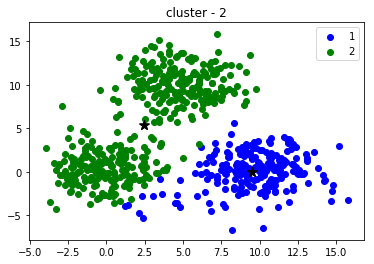

Total distance
k =  2 :  81320.80801576983


In [21]:
for i in range(k_number):
	new_data = np.array( [ data[j] for j in range(len(data)) if cluster[j] == i  ]  )
	plt.scatter(new_data[:, 0], new_data[:,1], label=i+1, color=colors[i])
	plt.scatter(center1_arr[:, 0], center1_arr[:,1], marker='*', s=100, color='k')

title = "cluster - " + str(k_number)
plt.title(title)
plt.legend(loc='best')
plt.show()
print("Total distance\nk = ", k_number,": ", np.sum(distance_data))	

In order to plot the graph, each group save actual data in new_data array

In [22]:
print("Total distance\nk = ", k_number,": ", np.sum(distance_data))	

Total distance
k =  2 :  81320.80801576983


This is the total distance of all data to cluster 2 (i.e. $$\sum_{i=1}^k\sum_{j\in C_i}\lVert \vec{x}_j-\vec{\mu}_i \rVert_{2}^{2}$$ )

## K = 3

The cluster 3 is totally the same as above only except for k_number value

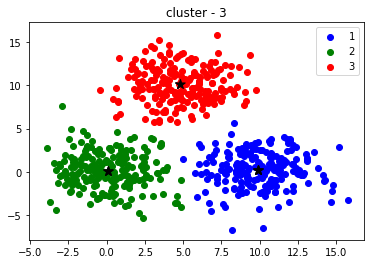

Total distance
k =  3 :  151297.4182373755


In [23]:
def plotGraph(data, k_number, colors, cluster, distance_data, center1_arr):
	for i in range(k_number):
		new_data = np.array( [ data[j] for j in range(len(data)) if cluster[j] == i  ]  )
		plt.scatter(new_data[:, 0], new_data[:,1], label=i+1, color=colors[i])
		plt.scatter(center1_arr[:, 0], center1_arr[:,1], marker='*', s=100, color='k')

	title = "cluster - " + str(k_number)
	plt.title(title)
	plt.legend(loc='best')
	plt.show()
	print("Total distance\nk = ", k_number,": ", np.sum(distance_data))	


def kMeans(data, k_number, colors):
	init_center = random.sample(range(len(data)), k_number)
	center = [0 for raw in range(k_number)]
	for i in range(k_number):
		center[i] = data[init_center[i]]
		 
	cluster = [0 for raw in range(len(data))]

	while True:
		new = [[] for raw in range(k_number)]
		count = [0 for raw in range(k_number)]
		distance_data = [[] for raw in range(len(data))]
			 
		for i in range(len(data)):
			for j in range(k_number):
				distance_data[i].append(np.square(np.linalg.norm(center[j]-data[i], 2)))
			
		for i in range(len(data)):
			cluster[i] = np.argmin(distance_data[i])
			new[ cluster[i] ].append(data[i])
			count[ cluster[i] ] += 1 
			
		center1 = [[] for raw in range(k_number)]
		
		for i in range(k_number):
			tmp = [ data[j] for j in range(len(data)) if cluster[j] == i ]
			center1[i] = np.mean(tmp, 0)
		
		center1_arr = np.array(center1)
		if np.all(center1_arr == center): 
			break 
		center = center1_arr 

	plotGraph(data, k_number, colors, cluster, distance_data, center1_arr)
	


def main():
	data = np.loadtxt('hw3.dat', delimiter=' ')
	colors=['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
	#kMeans(data, 2, colors)
	kMeans(data, 3, colors)
	#kMeans(data, 4, colors)
	#kMeans(data, 5, colors)


if __name__ == "__main__":
	main()

## K = 4

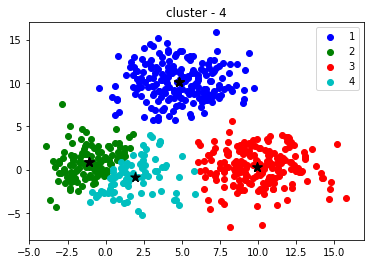

Total distance
k =  4 :  201511.95996879286


In [24]:
def plotGraph(data, k_number, colors, cluster, distance_data, center1_arr):
	for i in range(k_number):
		new_data = np.array( [ data[j] for j in range(len(data)) if cluster[j] == i  ]  )
		plt.scatter(new_data[:, 0], new_data[:,1], label=i+1, color=colors[i])
		plt.scatter(center1_arr[:, 0], center1_arr[:,1], marker='*', s=100, color='k')

	title = "cluster - " + str(k_number)
	plt.title(title)
	plt.legend(loc='best')
	plt.show()
	print("Total distance\nk = ", k_number,": ", np.sum(distance_data))	


def kMeans(data, k_number, colors):
	init_center = random.sample(range(len(data)), k_number)
	center = [0 for raw in range(k_number)]
	for i in range(k_number):
		center[i] = data[init_center[i]]
		 
	cluster = [0 for raw in range(len(data))]

	while True:
		new = [[] for raw in range(k_number)]
		count = [0 for raw in range(k_number)]
		distance_data = [[] for raw in range(len(data))]
			 
		for i in range(len(data)):
			for j in range(k_number):
				distance_data[i].append(np.square(np.linalg.norm(center[j]-data[i], 2)))
			
		for i in range(len(data)):
			cluster[i] = np.argmin(distance_data[i])
			new[ cluster[i] ].append(data[i])
			count[ cluster[i] ] += 1 
			
		center1 = [[] for raw in range(k_number)]
		
		for i in range(k_number):
			tmp = [ data[j] for j in range(len(data)) if cluster[j] == i ]
			center1[i] = np.mean(tmp, 0)
		
		center1_arr = np.array(center1)
		if np.all(center1_arr == center): 
			break 
		center = center1_arr 

	plotGraph(data, k_number, colors, cluster, distance_data, center1_arr)
	


def main():
	data = np.loadtxt('hw3.dat', delimiter=' ')
	colors=['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
	#kMeans(data, 2, colors)
	#kMeans(data, 3, colors)
	kMeans(data, 4, colors)
	#kMeans(data, 5, colors)


if __name__ == "__main__":
	main()

## K = 5

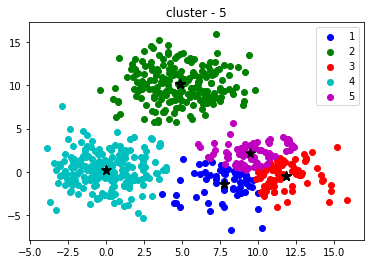

Total distance
k =  5 :  255676.87190850498


In [25]:
def plotGraph(data, k_number, colors, cluster, distance_data, center1_arr):
	for i in range(k_number):
		new_data = np.array( [ data[j] for j in range(len(data)) if cluster[j] == i  ]  )
		plt.scatter(new_data[:, 0], new_data[:,1], label=i+1, color=colors[i])
		plt.scatter(center1_arr[:, 0], center1_arr[:,1], marker='*', s=100, color='k')

	title = "cluster - " + str(k_number)
	plt.title(title)
	plt.legend(loc='best')
	plt.show()
	print("Total distance\nk = ", k_number,": ", np.sum(distance_data))	


def kMeans(data, k_number, colors):
	init_center = random.sample(range(len(data)), k_number)
	center = [0 for raw in range(k_number)]
	for i in range(k_number):
		center[i] = data[init_center[i]]
		 
	cluster = [0 for raw in range(len(data))]

	while True:
		new = [[] for raw in range(k_number)]
		count = [0 for raw in range(k_number)]
		distance_data = [[] for raw in range(len(data))]
			 
		for i in range(len(data)):
			for j in range(k_number):
				distance_data[i].append(np.square(np.linalg.norm(center[j]-data[i], 2)))
			
		for i in range(len(data)):
			cluster[i] = np.argmin(distance_data[i])
			new[ cluster[i] ].append(data[i])
			count[ cluster[i] ] += 1 
			
		center1 = [[] for raw in range(k_number)]
		
		for i in range(k_number):
			tmp = [ data[j] for j in range(len(data)) if cluster[j] == i ]
			center1[i] = np.mean(tmp, 0)
		
		center1_arr = np.array(center1)
		if np.all(center1_arr == center): 
			break 
		center = center1_arr 

	plotGraph(data, k_number, colors, cluster, distance_data, center1_arr)
	


def main():
	data = np.loadtxt('hw3.dat', delimiter=' ')
	colors=['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
	#kMeans(data, 2, colors)
	#kMeans(data, 3, colors)
	#kMeans(data, 4, colors)
	kMeans(data, 5, colors)


if __name__ == "__main__":
	main()

## Conclusion

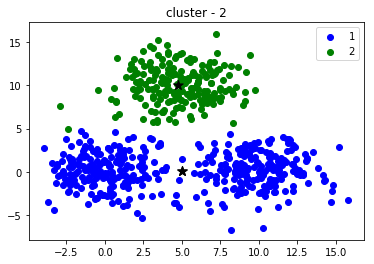

Total distance
k =  2 :  87941.70368074413


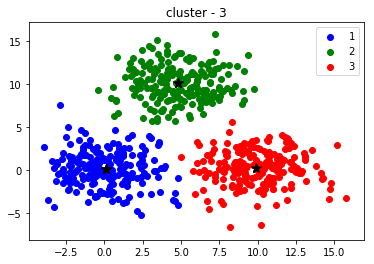

Total distance
k =  3 :  151297.4182373755


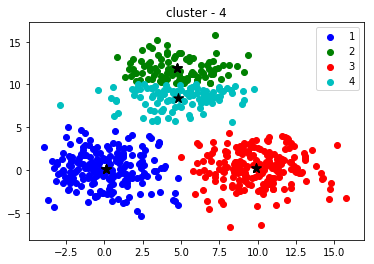

Total distance
k =  4 :  209897.4611050111


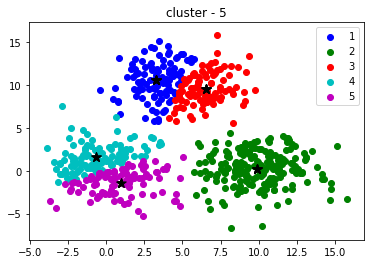

Total distance
k =  5 :  260237.67535944516


In [26]:
def plotGraph(data, k_number, colors, cluster, distance_data, center1_arr):
	for i in range(k_number):
		new_data = np.array( [ data[j] for j in range(len(data)) if cluster[j] == i  ]  )
		plt.scatter(new_data[:, 0], new_data[:,1], label=i+1, color=colors[i])
		plt.scatter(center1_arr[:, 0], center1_arr[:,1], marker='*', s=100, color='k')

	title = "cluster - " + str(k_number)
	plt.title(title)
	plt.legend(loc='best')
	plt.show()
	print("Total distance\nk = ", k_number,": ", np.sum(distance_data))	


def kMeans(data, k_number, colors):
	init_center = random.sample(range(len(data)), k_number)
	center = [0 for raw in range(k_number)]
	for i in range(k_number):
		center[i] = data[init_center[i]]
		 
	cluster = [0 for raw in range(len(data))]

	while True:
		new = [[] for raw in range(k_number)]
		count = [0 for raw in range(k_number)]
		distance_data = [[] for raw in range(len(data))]
			 
		for i in range(len(data)):
			for j in range(k_number):
				distance_data[i].append(np.square(np.linalg.norm(center[j]-data[i], 2)))
			
		for i in range(len(data)):
			cluster[i] = np.argmin(distance_data[i])
			new[ cluster[i] ].append(data[i])
			count[ cluster[i] ] += 1 
			
		center1 = [[] for raw in range(k_number)]
		
		for i in range(k_number):
			tmp = [ data[j] for j in range(len(data)) if cluster[j] == i ]
			center1[i] = np.mean(tmp, 0)
		
		center1_arr = np.array(center1)
		if np.all(center1_arr == center): 
			break 
		center = center1_arr 

	plotGraph(data, k_number, colors, cluster, distance_data, center1_arr)
	


def main():
	data = np.loadtxt('hw3.dat', delimiter=' ')
	colors=['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
	kMeans(data, 2, colors)
	kMeans(data, 3, colors)
	kMeans(data, 4, colors)
	kMeans(data, 5, colors)


if __name__ == "__main__":
	main()

#### Question: The total distance of all data to their corresponding cluster centers

k =  2 :  81088.7094893007

k =  3 :  151297.4182373755

k =  4 :  203369.19481119514

k =  5 :  259759.02544805338

#### Question: Based on your experiment, which k is the best fit for this set of data? 

k = 3